In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('pokemon.csv')
print (df.shape)
df.head(5)

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 1 Bar chart => Seaborn Countplot

If data in unsummarized then using countplot is the best option

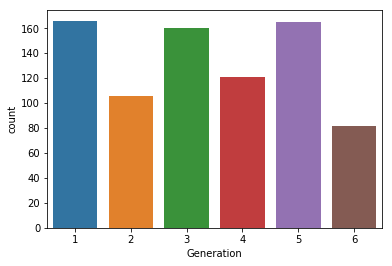

In [4]:
sns.countplot(data = df, x = 'Generation');

###  Set the color right

In [9]:
color = sns.color_palette()[0]

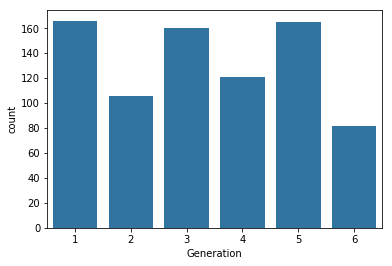

In [10]:
sns.countplot(data = df, x = 'Generation', color=color);

###  Sort by frequency

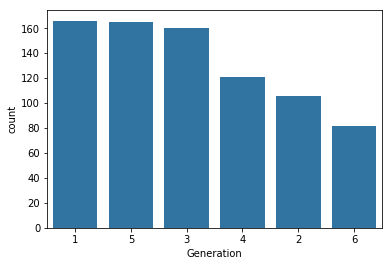

In [13]:
# We can either do it by coding it manually in the order parameter
sns.countplot(data = df, x = 'Generation', order = [1,5,3,4,2,6], color=color)

In [21]:
# but we should obtain this index programatically. here value_counts function comes in handy
gen_order = df['Generation'].value_counts().index

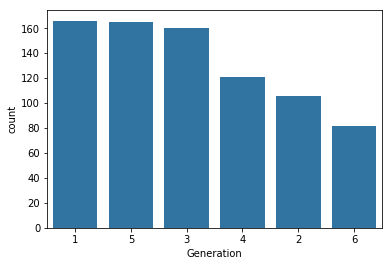

In [22]:
sns.countplot(data = df, x = 'Generation', order = gen_order, color=color)

### Ordered Categorical Variable

In [25]:
# Option 1 is to define the custom order in gen_order 
# Option 2 is to convert the column into an ordered categorical data type

### Rotate X labels

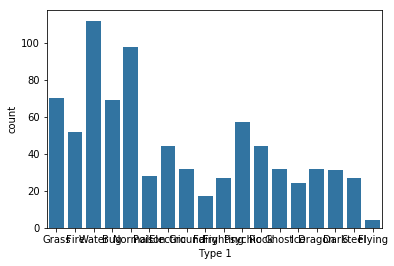

In [19]:
sns.countplot(data = df, x = 'Type 1', color=color)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

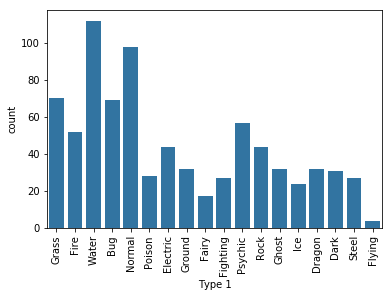

In [20]:
# The X labels are un readable so we use matplotlib xticks to rotate the x axis by 90 degrees
sns.countplot(data = df, x = 'Type 1', color=color)
plt.xticks(rotation=90)

### Horizontal Bar chat

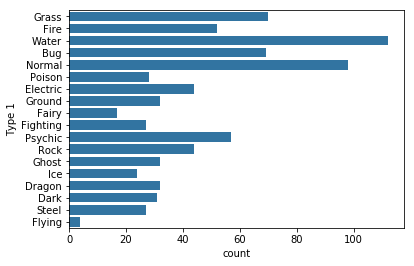

In [18]:
# We can obtain this just by changing x to y
sns.countplot(data = df, y = 'Type 1', color=color)

In [23]:
type_order = df['Type 1'].value_counts().index

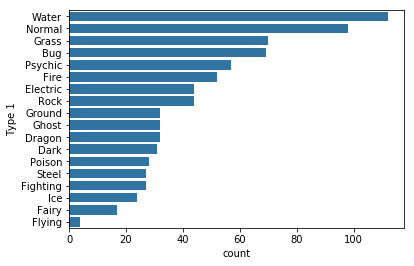

In [24]:
sns.countplot(data = df, y = 'Type 1', order=type_order, color=color);

### Absolute Vs Relative Frequency

In [26]:
type_counts = df['Type 1'].value_counts()
type_order = type_counts.index

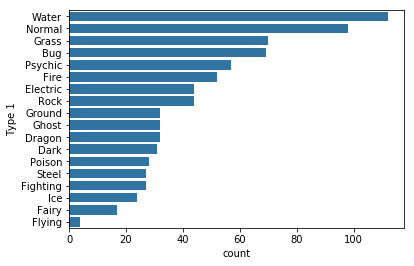

In [27]:
sns.countplot(data = df, y = 'Type 1', order=type_order, color=color);

#### a) Using Matplotlib to change xticks to proportions instead of counts

In [30]:
n_pokemon = type_counts.sum()
max_type_count = type_counts[0]
max_prop = max_type_count/n_pokemon
print (max_prop)

0.14


In [33]:
tick_props = np.arange(0.0, max_prop, 0.02)

Text(0.5,0,'Proportion')

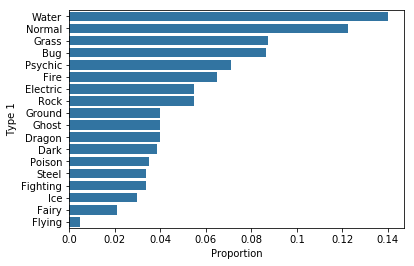

In [34]:
sns.countplot(data = df, y = 'Type 1', order=type_order, color=color);
plt.xticks(tick_props * n_pokemon, tick_props)
plt.xlabel('Proportion')

#### b) Have counts on the x axis but have text on the bars to show proportion

In [37]:
type_counts = df['Type 1'].value_counts()
type_order = type_counts.index
n_pokemon = type_counts.sum()
n_type = type_counts.shape[0]

In [38]:
n_type

18

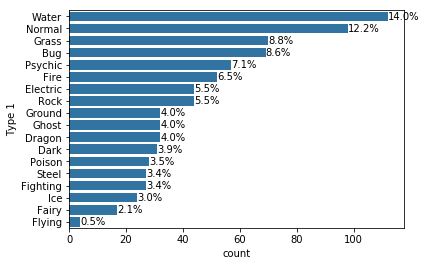

In [43]:
sns.countplot(data = df, y = 'Type 1', order=type_order, color=color);

for i in range(n_type):
    x, y = type_counts[i], i
    text_string = '{:0.1f}%'.format(100*type_counts[i]/n_pokemon)
    plt.text(x, y, text_string, va='center' )

## 2 Bar chart => Seaborn Barplot

Useful when data is in the summarized format

### Missing value count

In [46]:
na_counts = df.isna().sum()

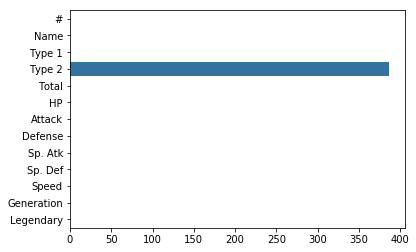

In [48]:
sns.barplot(y=na_counts.index, x=na_counts, color = color)

## 3 Pie Chart => Matplotlib pie function

It requires data in the summarized format

In [61]:
gen_counts = df['Generation'].value_counts()
gen_counts

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

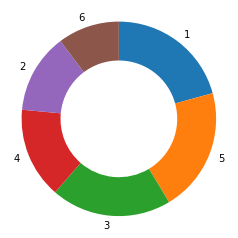

In [60]:
plt.pie(gen_counts, labels = gen_counts.index, startangle = 90, counterclock=False,
       wedgeprops = {'width': 0.4} );
plt.axis('square');

## 4 Histogram => Matplotlib hist & Seaborn distplot

### Matplotlib hist

(array([  5.,  25.,  59.,  38.,  89.,  94., 104.,  64.,  67.,  77.,  79.,
         29.,  36.,  14.,   9.,   2.,   7.,   1.,   0.,   1.]),
 array([  5.  ,  13.75,  22.5 ,  31.25,  40.  ,  48.75,  57.5 ,  66.25,
         75.  ,  83.75,  92.5 , 101.25, 110.  , 118.75, 127.5 , 136.25,
        145.  , 153.75, 162.5 , 171.25, 180.  ]),
 <a list of 20 Patch objects>)

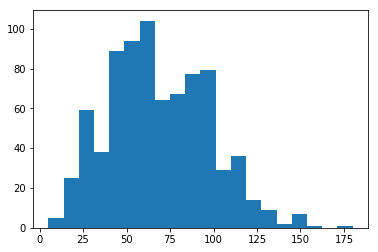

In [68]:
plt.hist(df['Speed'], bins = 20)

Bins are not defined properly. So to use the bins parameter effectively we have to manually define the bin boundaries explicitly

(array([  2.,  12.,  38.,  75.,  90., 103., 106.,  78.,  79.,  80.,  67.,
         36.,  15.,   8.,   5.,   4.,   1.,   1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180], dtype=int64),
 <a list of 18 Patch objects>)

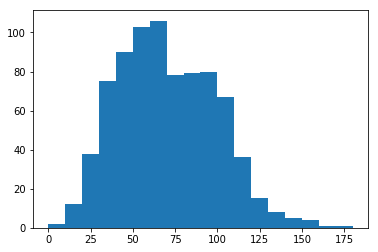

In [73]:
bins = np.arange(0, df['Speed'].max()+5, 10);
plt.hist(df['Speed'], bins = bins)

### Seaborn distplot

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


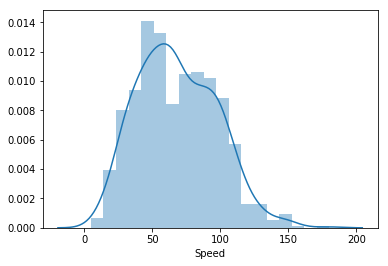

In [3]:
sns.distplot(df['Speed'])

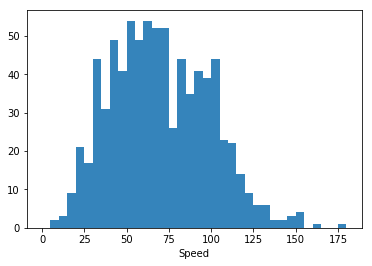

In [9]:
bin_edges = np.arange(0, df['Speed'].max()+1, 5)
sns.distplot(df['Speed'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 0.9})

### For Discrete Values

Since data is numeric, most obvious choice for plotting this type of data is histogram. but we run into the problem of interpretation of the chart. imagine 2 Dice Rolls data. Bin edges would be 2, 3, 4, 5, 6 etc. Histogram would indicate that values between 2 and 3. 


Make use of rwidth parameter, since gap indicates discreteness of value

In [ ]:
bin_edges = np.arange(1.5, 12+1.5, 1) 
bin_names = np.arange(2, 12+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth=0.7)
plt.xticks(bin_names)

## 5 Fig, Axes and Subplots

In [11]:
base_color = sns.color_palette()[0]

In [15]:
fig = plt.figure(figsize = (10,5))

<Figure size 720x360 with 0 Axes>

In [17]:
fig.add_subplot(1,2,1)

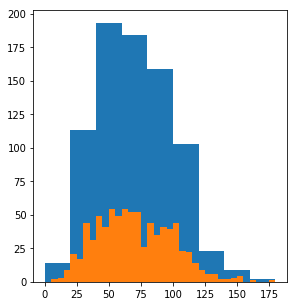

In [14]:
fig = plt.figure(figsize = (10, 5))

fig.
plt.subplot(1,2,1)
bin_edges = np.arange(0, df['Speed'].max()+1, 20)
plt.hist(df['Speed'], bins = bin_edges);

# plt.subplot(1,2,2)
bin_edges = np.arange(0, df['Speed'].max()+1, 5)
plt.hist(df['Speed'], bins = bin_edges);

## 6 Axis Limits

use of axis limits allow us to focus on data points in that range without needing to go through creation of a new dataframe

(100, 500)

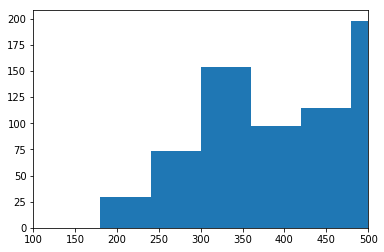

In [22]:
plt.hist(df['Total'])
plt.xlim((100, 500))

## Look for more in your charts beyond basic descriptive statistics. look for Skew, number of modes, outliers